<a href="https://colab.research.google.com/github/oluwamayowaa/Income-Classification-/blob/main/Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to predict whether an individual's annual income is $50,000 and below or more.
It is a binary classification project.
Data used in this project was gotten from the UC Irvine Machine Learning Repository.


**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Loading the data**

In [2]:
df= pd.read_csv("/content/adult.data")
df.columns= ['age', 'work_class', 'fnlgwt',
               'education', 'education_num',
               'marital_status', 'occupation',
               'relationship', 'race',
               'sex', 'capital_gain', 'capital_loss',
               'hours_per_week', 'native_country', 'class']

In [3]:
df.head()

,age,work_class,fnlgwt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#finding the number of samples and features in the datset
print('There are {} rows and {} columns'.format(df.shape[0], df.shape[1]))

There are 32560 rows and 15 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   work_class      32560 non-null  object
 2   fnlgwt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  class           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#checking for duplicate samples

print('There are {} duplicate samples in the dataframe'.format(df.duplicated().sum()))

There are 24 duplicate samples in the dataframe


In [7]:
#dropping duplicates

df.drop_duplicates(inplace= True)

In [8]:
df.shape

(32536, 15)

In [9]:
df['work_class'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Looking through the distinct values in the **work_class** column, we see that unknown/missing values in the data are represented with '?' .
We would replace it with numpy NaN values to help work with missing data.

In [10]:
df= df.replace(' ?', np.nan)

In [11]:
#checking for missing data

df.isna().sum()

age                  0
work_class        1836
fnlgwt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
class                0
dtype: int64

In [12]:
#handling missing data

df['work_class']= df['work_class'].fillna(method= 'bfill')
df['occupation']= df['occupation'].fillna(method= 'bfill')
df['native_country']= df['native_country'].fillna(method= 'bfill')

In [13]:
#Descriptive statistics

df.describe()

,age,fnlgwt,education_num,capital_gain,capital_loss,hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
#Target distribution

df['class'].value_counts()

 <=50K    24697
 >50K      7839
Name: class, dtype: int64

In [15]:
#Correlation between attributes

correlation= df.corr(method= 'pearson')
print(correlation)

                     age    fnlgwt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076448       0.036224      0.077676      0.057745   
fnlgwt         -0.076448  1.000000      -0.043353      0.000433     -0.010267   
education_num   0.036224 -0.043353       1.000000      0.122661      0.079901   
capital_gain    0.077676  0.000433       0.122661      1.000000     -0.031638   
capital_loss    0.057745 -0.010267       0.079901     -0.031638      1.000000   
hours_per_week  0.068515 -0.018900       0.148426      0.078408      0.054229   

                hours_per_week  
age                   0.068515  
fnlgwt               -0.018900  
education_num         0.148426  
capital_gain          0.078408  
capital_loss          0.054229  
hours_per_week        1.000000  


**Univariate Analysis**

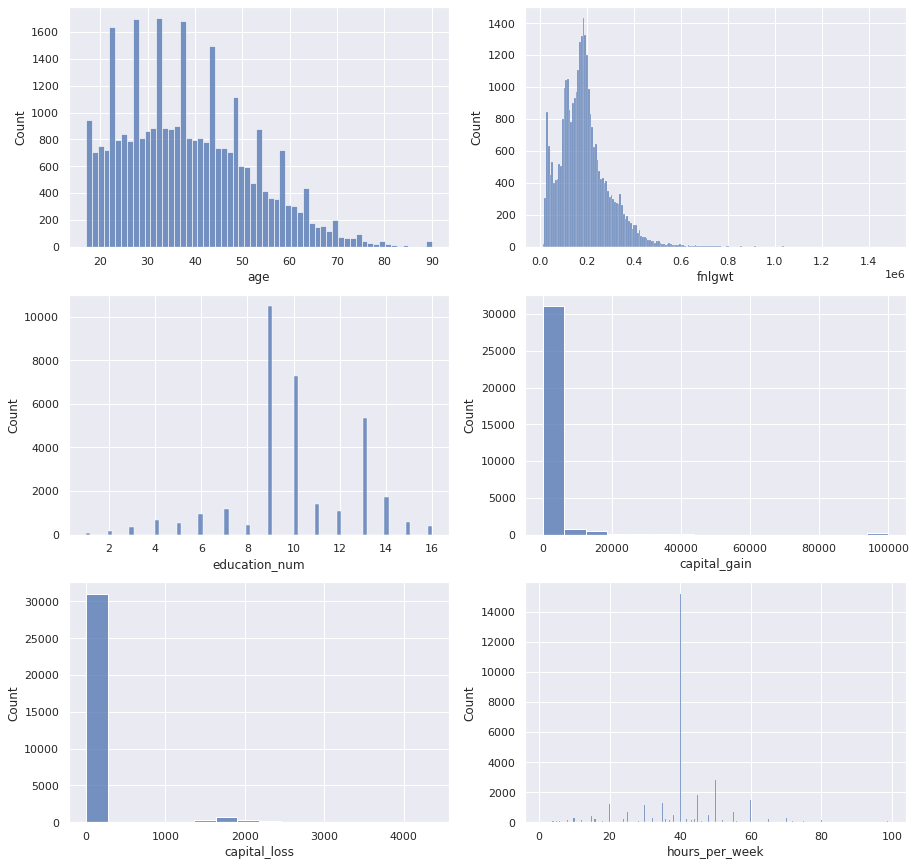

In [16]:
#determing the number of subplots

sns.set()

fig, axes= plt.subplots(3, 2, figsize=(15, 15))

#creating histogram for each numerical feature to find the distribution


sns.histplot(data= df, x='age', ax= axes[0, 0])
sns.histplot(data= df, x= 'fnlgwt', ax= axes[0, 1])
sns.histplot(data= df, x= 'education_num', ax= axes[1, 0])
sns.histplot(data= df, x= 'capital_gain', ax= axes[1, 1])
sns.histplot(data= df, x= 'capital_loss', ax= axes[2, 0])
sns.histplot(data= df, x= 'hours_per_week', ax= axes[2, 1])

The capital_gain feature seems to have an exponential distribution, while education_num and hours_per_week seem to have a Gaussian distribution.

**Univariate analysis of Categorical Features**

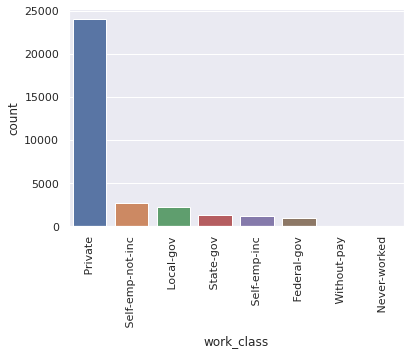

In [17]:
a= sns.countplot(x= 'work_class', data= df,
                 order= df['work_class'].value_counts().index)
a.set_xticklabels(
    labels= df['work_class'].value_counts().index,
    rotation= 90
)
plt.show()

  From the chart, we see that majority in the sample are private employees. The next populous group are the self-employed-not-inc.

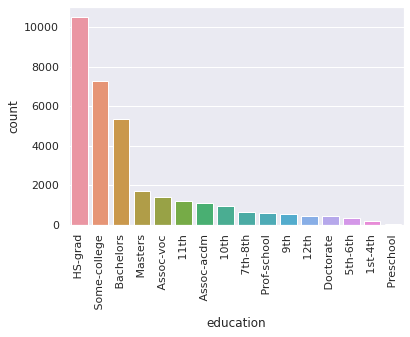

In [18]:
b= sns.countplot(x= 'education', data=df,
                 order= df.education.value_counts().index)
b.set_xticklabels(labels= df['education'].value_counts().index, rotation= 90)
plt.show()

  High school graduates make up the highest share of the sample size, with people who only did some part of college a close second.

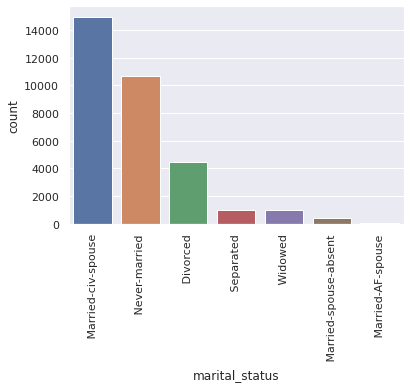

In [19]:
c= sns.countplot(x= 'marital_status', 
                 data=df,
                 order= df['marital_status'].value_counts().index)
c.set_xticklabels(labels= df['marital_status'].value_counts().index, 
                  rotation= 90)
plt.show()

The dataset consits mainly of people that are married, with those that never married having the second largest size in the dataset.


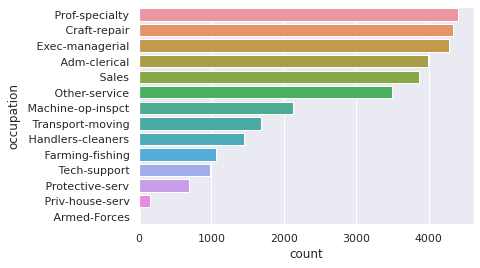

In [20]:
d= sns.countplot(y= 'occupation', data=df,
                 order= df['occupation'].value_counts().index
                 )

plt.show()

The top 3 occupations in the dataset are Professional specialists, Craft repairmen and Executive managers.

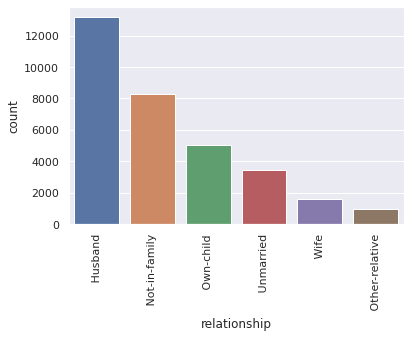

In [21]:
e= sns.countplot(x= 'relationship', data=df,
                 order= df['relationship'].value_counts().index)
e.set_xticklabels(labels= df['relationship'].value_counts().index, 
                  rotation= 90)
plt.show()

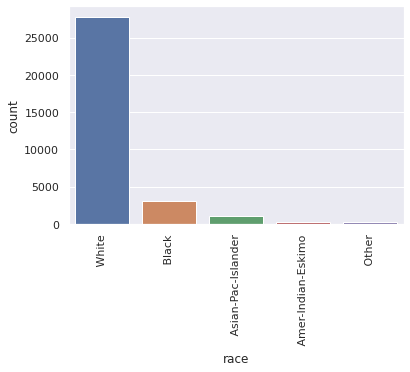

In [22]:
f= sns.countplot(x= 'race', data=df,
                 order= df['race'].value_counts().index)
f.set_xticklabels(labels= df['race'].value_counts().index, 
                  rotation= 90)
plt.show()

The race distribution from the dataset is overwhemingly white, with the group with the second largest size being black.

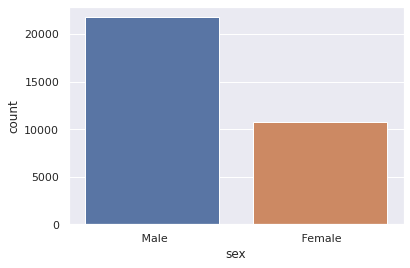

In [23]:
g= sns.countplot(x= 'sex', data=df)
plt.show()

The number of males in the dataset is more than double the amount of females.

In [24]:
#There are a lot of native countries in the dataframe

print('There are {} different countries in the dataset'.format(
        df['native_country'].nunique()))


There are 41 different countries in the dataset


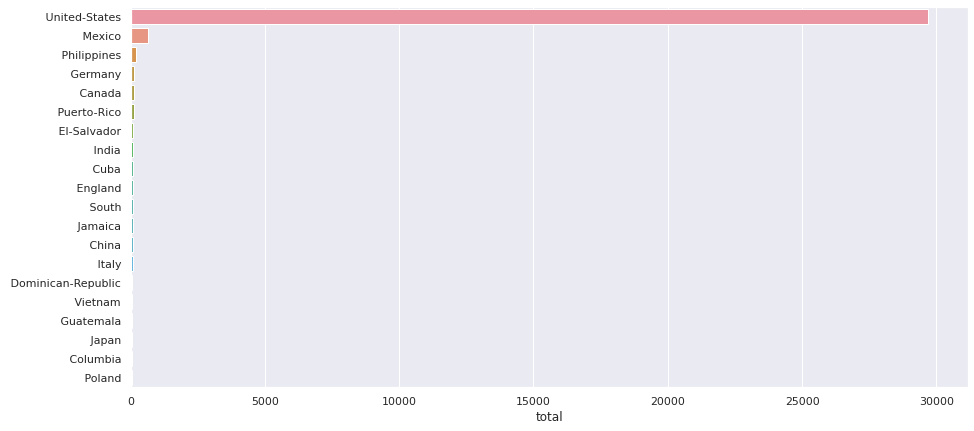

In [25]:
#Finding the distribution of the most populous 20 countries
dense = df['native_country'].value_counts().head(20)
dense_df= pd.DataFrame(dense)
dense_df.columns=['total']

fig= plt.gcf()

fig.set_size_inches(15, 7)

h= sns.barplot(y= dense_df.index, x= dense_df['total'], data= dense_df)

More than 90% of the sample size are natives of the United States of America

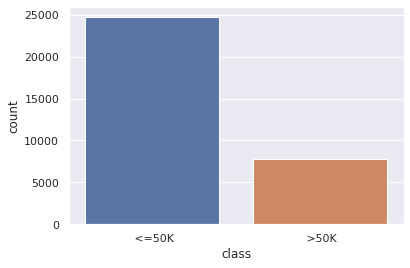

In [26]:
i= sns.countplot(x= 'class', data=df)
plt.show()

From the chart, we can se our dataset is imbalanced, albeit, slightly. The number of people earning >$50k are less than 1/2 those that do not.

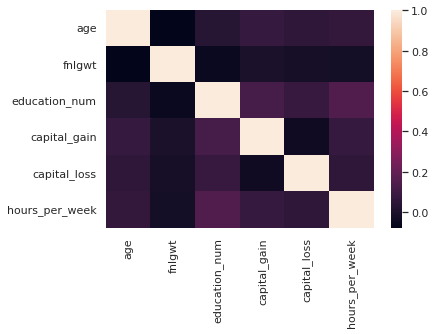

In [27]:
#Correlation matrix

sns.heatmap(correlation)
plt.show()

From the correlation heatmap, we can see that none of the features are positively correlated.

**Multivarite Analysis.**

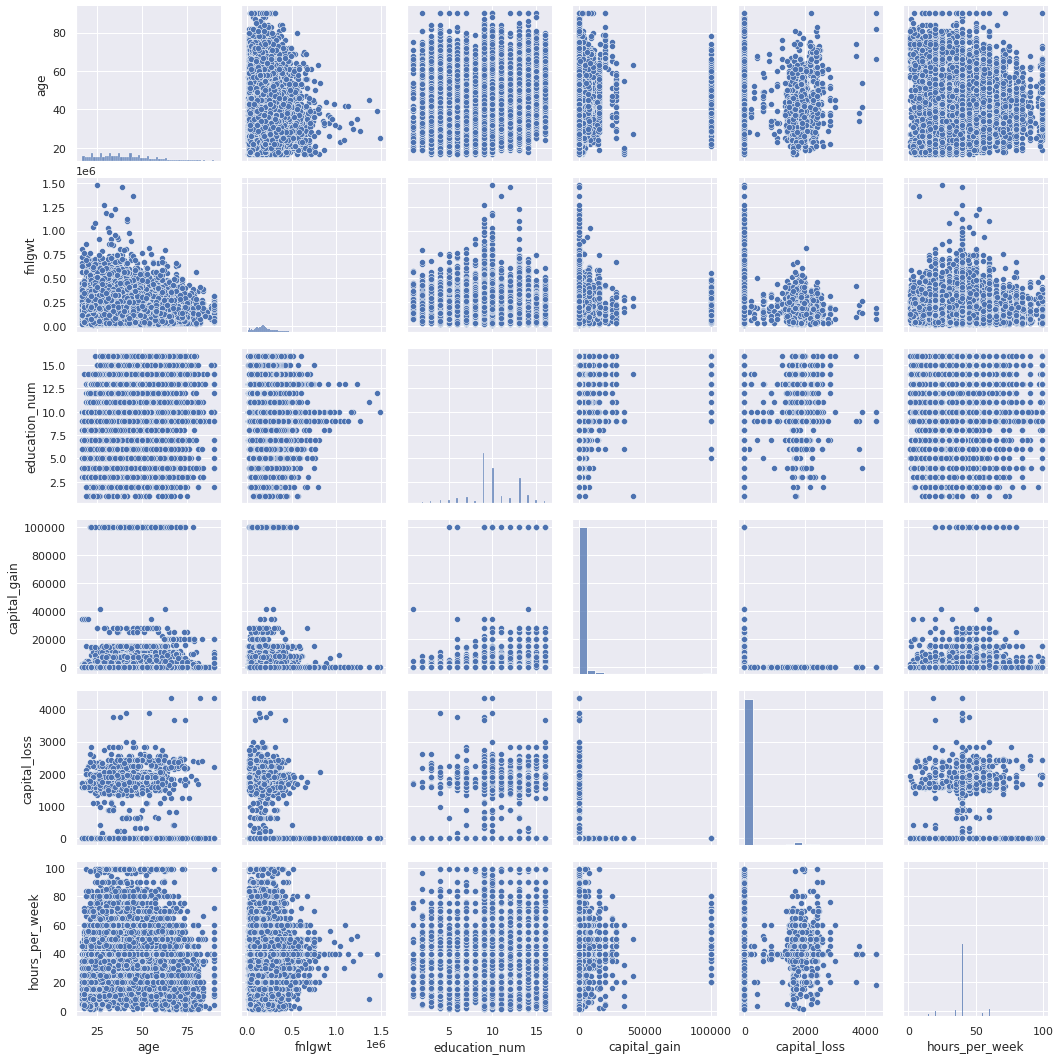

In [28]:
# pairwise correlation of features with each other

sns.pairplot(df)

**Data Preprocessing**

Seperating features and target variables

In [29]:
y= df['class']
features= df.drop('class', axis= 1)

In [30]:
y= y.replace([' <=50K', ' >50K'], [0, 1]) # targets >50k would be labeled as 1, 0 otherwise
y= y.to_numpy()
y[0:5]

array([0, 0, 0, 0, 0])

In [31]:
categorical_columns= [col for col in features.columns if features[col].dtype == 'object']
categorical_columns

['work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [32]:
numerical_columns= [j for j in features.columns if features[j].dtype == 'int64']
numerical_columns

['age',
 'fnlgwt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [33]:
dummy= pd.get_dummies(data= features, columns=['work_class', 'education',
                        'marital_status', 'occupation',
                        'relationship', 'race', 'sex', 'native_country'])

x= dummy

In [34]:
#Standarding the data

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X= scaler.fit_transform(x)


In [35]:
len(X)

32536

In [36]:
#There are a lot of features
#To reduce them, we'll run Principal Componet Analysis

from sklearn.decomposition import PCA

pca= PCA(n_components= 15)
pca.fit(X)
pca_X= pca.transform(X)

#PCA_cols= []
#for num in range(15):
#    PCA_cols.append('PCA'+str(num))

#pca_X


In [37]:
# Splitting the dataset into train and test set

# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test= train_test_split(pca_X, y, test_size= 0.33, 
                                                   #random_state= 40)

In [38]:
#x_train.shape

In [39]:
#y_train.shape

In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits= 10, random_state= 7, shuffle= True)

lr= LogisticRegression()
svm= SVC()
knn= KNeighborsClassifier(n_neighbors= 10)

lr_scores= cross_val_score(lr, pca_X, y, cv= cv, n_jobs= 10)
svm_scores= cross_val_score(svm, pca_X, y, cv= cv, n_jobs= 10)
knn_scores= cross_val_score(knn, pca_X, y, cv= cv, n_jobs= 10)

print('The accuracy of the Logistic Regression model is {} '.format(lr_scores.mean() * 100))
print('The accuracy of the SVM model is {} '.format(svm_scores.mean() * 100))
print('The accuracy of the KNN model is {} '.format(knn_scores.mean() * 100))

The accuracy of the Logistic Regression model is 83.44602145889256 
The accuracy of the SVM model is 83.48598362515732 
The accuracy of the KNN model is 83.05874053944059 


Loading test data

In [41]:
test= pd.read_csv('/content/adult.test')
test.columns= ['age', 'work_class', 'fnlgwt',
               'education', 'education_num',
               'marital_status', 'occupation',
               'relationship', 'race',
               'sex', 'capital_gain', 'capital_loss',
               'hours_per_week', 'native_country', 'class']

In [42]:
test.head(3)

,age,work_class,fnlgwt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


In [43]:
test= test.replace(' ?', np.nan)


In [44]:
test.isna().sum()

age                 0
work_class        963
fnlgwt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
class               0
dtype: int64

In [45]:
test.work_class= test.work_class.fillna(method= 'bfill')
test.occupation= test.occupation.fillna(method= 'bfill')
test.native_country= test.native_country.fillna(method= 'bfill')

In [46]:
test.isna().sum()

age               0
work_class        0
fnlgwt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

In [47]:
# Splitting test data into feature and target variables

y_test= test['class']
test_features= test.drop('class', axis=1)

In [48]:
class_values= y_test.value_counts().index.tolist()

In [49]:
y_test= y_test.replace(class_values, [0, 1])
y_test= y_test.to_numpy()
y_test[0:5]

array([0, 1, 1, 0, 0])

In [50]:
test_dummy= pd.get_dummies(data= test_features,  columns=['work_class', 'education',
                        'marital_status', 'occupation',
                        'relationship', 'race', 'sex', 'native_country'])

test_X= test_dummy

In [51]:
scaled_test= scaler.fit_transform(test_X)
scaled_test[0]

array([-0.0554782 , -0.94234358, -0.4179646 , -0.14266632, -0.21806907,
        0.76989214, -0.1767151 , -0.27023927, -0.01567675,  0.60526436,
       -0.19880879, -0.30828998, -0.21511042, -0.022173  , -0.16975567,
       -0.20162977, -0.11811507, -0.0698301 , -0.10454167, -0.13909553,
       -0.12283796, -0.18415584, -0.20862131, -0.4429213 , -0.1060327 ,
        1.44276902, -0.2467038 , -0.04437875, -0.12689704, -0.53159826,
       -0.39424533, -0.02933754,  1.09503811, -0.1143146 , -0.70772581,
       -0.17892087, -0.18254521, -0.37006878, -0.0192012 , -0.38819155,
       -0.38986597,  5.42493378, -0.22083104, -0.26616025, -0.34392656,
       -0.07901051, -0.39164132, -0.14844286, -0.37135498, -0.18575433,
       -0.22867309,  1.22302255, -0.59702646, -0.18254521, -0.42714408,
       -0.33910489, -0.22174732, -0.09931219, -0.17429787, -0.32554302,
       -0.09144245,  0.40909634, -0.70655307,  0.70655307, -0.02351874,
       -0.06132716, -0.05437942, -0.03999508, -0.05264779, -0.04

In [52]:
pca.fit(scaled_test)
X_test= pca.transform(scaled_test)

In [54]:
# From the train data, SVM had the best accuracy
svm.fit(pca_X, y)
y_preds= svm.predict(X_test)
y_preds[0:5]

array([0, 0, 0, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score



In [56]:
cf= confusion_matrix(y_test, y_preds)
print(cf)


[[11838   596]
 [ 2443  1403]]


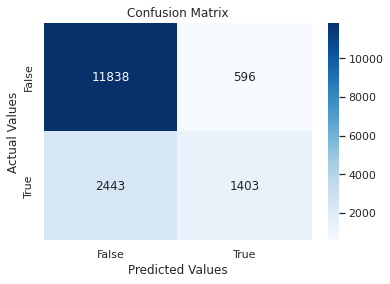

In [57]:
ax= sns.heatmap(cf, annot= True, cmap= 'Blues', fmt= '3g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_xticklabels(['False', 'True'])
ax.set_yticklabels(['False', 'True'])

plt.show()

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision= precision_score(y_test, y_preds, average= 'weighted')
print('Precision= ', precision)
recall= recall_score(y_test, y_preds, average= 'weighted')
print('Recall= ', recall)
f1_score= f1_score(y_test, y_preds, average= 'weighted')
print('F1 score= ', f1_score)
roc_auc= roc_auc_score(y_test, y_preds, average= 'weighted')
print('ROC AUC= ', roc_auc)

Precision=  0.7989114493883772
Recall=  0.8133292383292383
F1 score=  0.7902885232042975
ROC AUC=  0.6584307525429535
